# Weekly assignment 3


Explain briefly in your own words how linear regression works:
Linear regression shows the relation between two variables: the y variable (dependent) and x variable (independent). The relationship can either be positive (asending graph), negative(descending graph)or no realtionship at all. 
The linear regression model is able to predict y based on x (or multiple x variables) to certain degree.
The variation of the model is the degree to which a model is accuratly able to predict an outcome.

### Data pre-processing steps

Importing necessary libraries

In [14]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Getting the dataset

In [24]:
df = pd.read_csv('data Mashable.csv')
print("This is the head of the resulting dataframe:")
df.head(10)

This is the head of the resulting dataframe:


,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
5,6,http://mashable.com/2014/04/24/amazing-lebron-...,13,303,2,0,4.970297,0,0,0,...,0,0,0,0,0.394298,0.048684,0.000000,0.000000,1200,3.079181
6,7,http://mashable.com/2013/06/22/social-media-we...,6,544,11,0,4.617647,0,0,0,...,0,1,0,1,0.439512,0.267391,0.500000,0.500000,3500,3.544068
7,8,http://mashable.com/2013/07/09/russian-deletes...,12,223,1,0,4.399103,0,0,0,...,0,0,0,0,0.394792,0.053125,0.218182,0.145455,1500,3.176091
8,9,http://mashable.com/2013/03/07/3d-printed-skull/,8,438,1,0,5.027397,0,0,0,...,0,0,0,0,0.479187,0.166913,0.500000,0.200000,3100,3.491362
9,10,http://mashable.com/2013/11/16/xbox-one-vs-pla...,11,389,1,1,4.642674,0,0,1,...,0,1,0,1,0.417229,0.183895,0.166667,0.000000,27300,4.436163


### Selecting Dataset to be analyzed
As we want to to predict the number of shares that needs to be our y-variable. Further we need to select 5 x-variables to base our prediction on. I selected the variables 'number of images', 'number of videos', 'data channel is tech', 'average token length' and 'is weekend' because I am curious if these variables can impact the number of shares. Ideally these insights can lead to actionable insights to adjust e.g. the number of images in the article. 

In [16]:
y = df['shares_log'] 
X = df[['num_imgs','num_videos', 'data_channel_is_tech', 'average_token_length', 'is_weekend']] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.index = df['id'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()

,num_imgs,num_videos,data_channel_is_tech,average_token_length,is_weekend
id,,,,,
1,12,0,1,4.518879,0
2,6,0,0,5.040900,0
3,0,1,0,4.877863,0
4,2,0,0,4.974820,0
5,18,0,1,4.928409,0


We now have our X and y, and can start training the model. First, let's split the data into a training set and a test set.

### Splitting the dataset into a training and test set

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,num_imgs,num_videos,data_channel_is_tech,average_token_length,is_weekend
id,,,,,
20922,0,1,0,4.560284,1
4486,9,0,0,4.732143,0
17756,1,0,0,4.710611,0
4705,23,1,0,4.669323,0
13494,13,2,0,4.511702,0


Training the linear model:

In [18]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

Let's have a look at the coefficients

In [28]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
0.004225,num_imgs
0.004840,num_videos
0.053927,data_channel_is_tech
-0.019221,average_token_length
0.129586,is_weekend


The coefficient is how much the specific x variable changes/has an impact on the y variable we are trying to predict. For example, for every additional picture the amount of shares increases by 0.004. However, this is only valid to a certain extent as at some point the more pictures dont result in more shares. The is_weekend variable increseases the amount of shares by 0.129 percent. All of the coefficients seem to be rather low and have only little impact on the amount of shares. 

### The equation of the model

In [67]:
b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] #lm.coef_ gets a list of coefficients (excluding the intercept). [0] gets the actual number from the list

print(f"The regression line is equal to y = {b0:.2f} + {b1:.5f}X") #.0f formats to 2 decimals. 

The regression line is equal to y = 3.29 + 0.00422X


Or, in a pretty markdown formula :

$y= 3.29 + 0.00422X$

That means the intercept is 3.29 and the slope is 0.0042. We have a graph that hits the y axis at 3,29 and has a slightly positie/ascending shape.

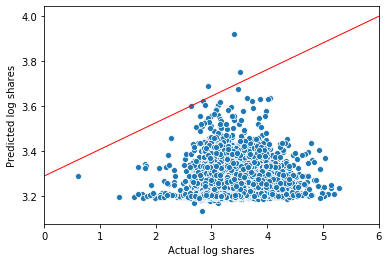

In [77]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual log shares')
plt.ylabel('Predicted log shares')
plt.xlim([0,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
#plt.ylim([3,4])
plt.plot([0,6], [b0, 4], color='red', lw=1) #Plot a diagonal length
plt.show()

(I am not sure if this is right? The red line doesnt really match the dots well.)

### Plots of the relation of your selected variables with the target



In [42]:
corr = df[['shares_log', 'num_imgs','num_videos', 'data_channel_is_tech', 'average_token_length', 'is_weekend']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,shares_log,num_imgs,num_videos,data_channel_is_tech,average_token_length,is_weekend
shares_log,1.000000,0.085575,0.037147,0.047729,-0.031730,0.105919
num_imgs,0.085575,1.000000,-0.073084,-0.008546,0.022387,0.053317
num_videos,0.037147,-0.073084,1.000000,-0.098555,-0.006436,-0.016556
data_channel_is_tech,0.047729,-0.008546,-0.098555,1.000000,0.000492,-0.003276
average_token_length,-0.031730,0.022387,-0.006436,0.000492,1.000000,-0.005759
is_weekend,0.105919,0.053317,-0.016556,-0.003276,-0.005759,1.000000


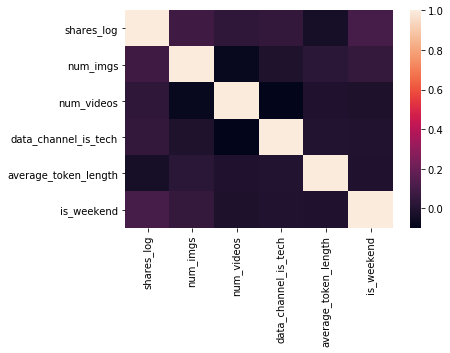

In [43]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

All x-variables have a very week relationship with the number of shares. Further when plotting the graphs of the relationship of each x variable with the number of shares, it could be observed that there is no clear line and it seems somewhat random. 

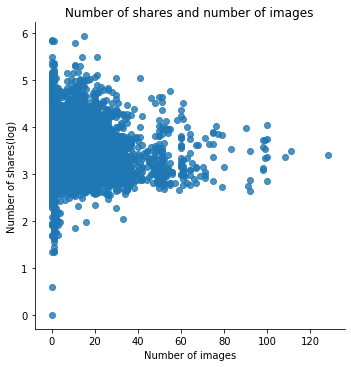

In [54]:
sns.lmplot(x='num_imgs', y='shares_log', data=df, fit_reg=False) #The last argument leaves out a so-called "confidence interval"
plt.title('Number of shares and number of images')
plt.xlabel('Number of images')
plt.ylabel('Number of shares(log)')
plt.show()

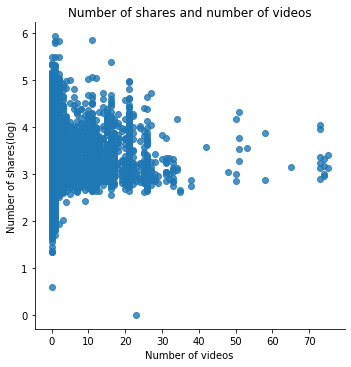

In [55]:
sns.lmplot(x='num_videos', y='shares_log', data=df, fit_reg=False) #The last argument leaves out a so-called "confidence interval"
plt.title('Number of shares and number of videos')
plt.xlabel('Number of videos')
plt.ylabel('Number of shares(log)')
plt.show()

The graphs of the number of videos and pictures look very similar. It seems that including 0 pictures and videos covers the whole spectrum of high and low ammount of shares. The ones with the most images/videos score mediocre. The rest is somewhere in between. 

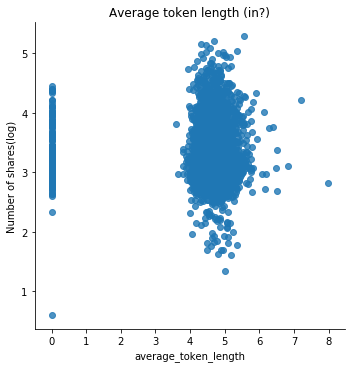

In [78]:
sns.lmplot(x='average_token_length', y='shares_log', data=df, fit_reg=False) #The last argument leaves out a so-called "confidence interval"
plt.title('Average token length (in?)')
plt.ylabel('Number of shares(log)')
plt.show()

Perhaps the 0 average token length was something I should have perhaps cleaned up? Except from that, the average token length seems to be fairly similar for all articles and still the share log covers the whole spectrum. I therefore assume that there is no strong relationship between token length and number of shares. 

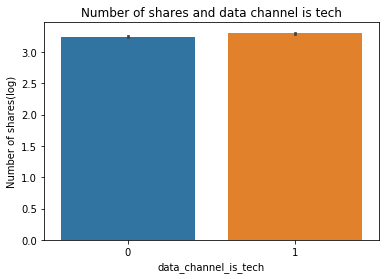

In [60]:
sns.barplot(x='data_channel_is_tech', y='shares_log', data=df) #The last argument leaves out a so-called "confidence interval"
plt.title('Number of shares and data channel is tech')
plt.xlabel('data_channel_is_tech')
plt.ylabel('Number of shares(log)')
plt.show()

The bar plot doesnt tell much about the nature of the relationship, but I quite honestly didnt know how else to plot a boolean variable. This graph tells us that the data_channel_is_tech was shared slightly more often than when it was not the case. Likewise, the graph below demonstartes that generally speaking the shares were higer on weekends. 

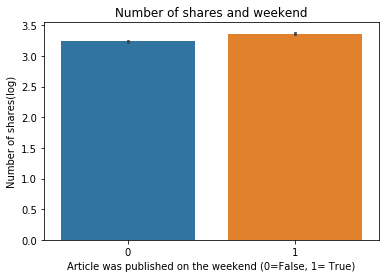

In [66]:
sns.barplot(x='is_weekend', y='shares_log', data=df) #The last argument leaves out a so-called "confidence interval"
plt.title('Number of shares and weekend')
plt.xlabel('Article was published on the weekend (0=False, 1= True)')
plt.ylabel('Number of shares(log)')
plt.show()

## Evaluating the model on the test data
### Predictive power of the model (R2)

In [20]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.021151165326994348

The R^2 is 0.02, which means 2% of the variation in shares is explained by the model. That's not very good.

Let's calculate the RMSE: the root mean squared error.

### Predictive power of the model (RMSE)

In [21]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.4017146110947441

The RMSE is 0.40, which means that we are typically about 0.40 off in our predicted rating (which goes from 0-10). 

Finally, let's plot the predicted value against the actual shares.

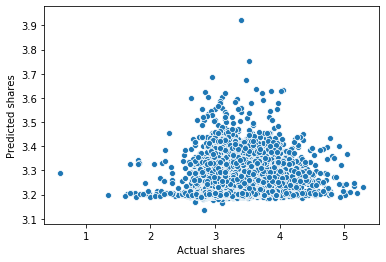

In [76]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
#plt.xlim([1,5]) #Forcing the x- and y-axis to be the same length, so that we can compare 
#plt.ylim([1,5])
#plt.plot([1, 5], [1, 5], color='red', lw=3) #Plot a diagonal length
plt.show()

### Investigate residuals

In [82]:
df['residual'] = y_test_p - df["shares_log"] #use built-in predict() method to generate predictions; store in original datafdframe
df= df.dropna()
df_sub = df[["shares_log","predicted_shares", "residual"]]
print(df_sub)

       shares_log  predicted_shares  residual
0        3.322219         -0.015886  0.055342
2        3.176091          0.023557 -0.009485
4        3.778151         -0.454341 -0.416114
6        3.544068         -0.114272 -0.231024
7        3.176091          0.032145  0.096271
...           ...               ...       ...
24980    3.322219         -0.123545 -0.119840
24985    3.397940         -0.107879 -0.140077
24988    3.041393          0.162000  0.233043
24991    3.146128          0.203469  0.058041
24994    3.929419         -0.637870 -0.656963

[7500 rows x 3 columns]


I added a column with 'residual' to the data frame. When subtracting the actual shares from the predicted shares we can see how  far off the predicted shares were from the actual shares. This is demonstarted by the residual column. 